# TimML Notebook 5
## Impermeable walls

Impermeable walls may be modeled with strings of line-doublets using the `ImpLineDoubletString` element. The `ImpLineDoubletString` element has an option
called order. The no-flow condition is applied at order+1 control points along the segments. Between the
control points, the condition is met approximately. The modeler needs to verify whether the chosen lengths
of segments and orders results in an accurate solution. 

In the current implementation, order cannot be larger than 8. Impermeable walls can be placed in multiple layers by entering a list of layers using the keyword argument `layers = []`.

<img src="figs/timml_notebook5_layout.png">
#### Figure of the model

Consider an aquifer with a uniform flow from West to East. The aquifer is divided in four layers with
equal hydraulic conductivity; the model is created with the `Model3D` command. A square building pit is
surrounded by impermeable walls that extend halfway into the aquifer: they are placed in the top two model
layers. In the center of the building pit, a well is screened in the top aquifer. 

In [1]:
from timml import *
from pylab import *
%matplotlib notebook

In [2]:
ml = Model3D(kaq=1, z=[40, 30, 20, 10, 0], kzoverkh=1)
uf = Uflow(ml, slope=0.01, angle=0)
rf = Constant(ml, xr=200, yr=0, hr=50)
xp = [-100, 100, 100, -100, -100]
yp = [-100, -100, 100, 100, -100]
ld = ImpLineDoubletString(ml, xy=list(zip(xp, yp)), layers=[0, 1], order=3)
w = Well(ml, xw=0, yw=0, Qw=400, rw=0.1, layers=0)
ml.solve()

Number of elements, Number of equations: 4 , 33
....
solution complete


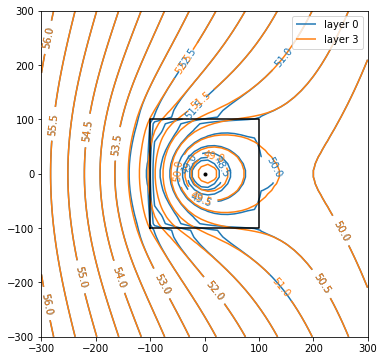

In [3]:
ml.contour(win=[-300, 300, -300, 300], ngr=50, 
           labels=1, decimals=1, layers=[0, 3], levels=np.arange(48, 58, 0.5),
           figsize=(6,6))

.....

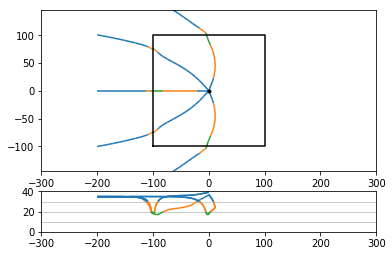

In [4]:
ml.plot(win=[-300, 300, -300, 300], orientation='both')
ml.tracelines(xstart=-200 * ones(5), ystart=np.arange(-200, 201, 100), 
              zstart=35 * ones(5), hstepmax=10, tmax=20 * 365.25, orientation='both')

...

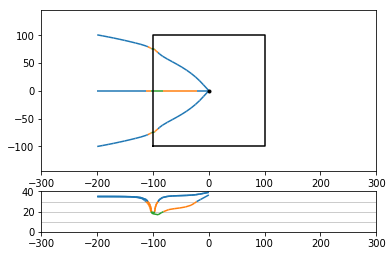

In [5]:
ml.plot(win=[-300, 300, -300, 300], orientation='both')
ml.tracelines(xstart=-200 * ones(3), ystart=np.arange(-100, 101, 100), 
              zstart=35 * ones(3), hstepmax=10, tmax=20 * 365.25, orientation='both')